# Data cleaning part for Heart_2020.csv

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
# Load the dataset
df = pd.read_csv('heart_2020.csv')  # Replace 'path_to_your_file.csv' with the path to your dataset

# Display the first few rows of the dataframe
print(df.head())

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

In [2]:
# Check the shape of the dataframe
print("Dataframe shape:", df.shape)

Dataframe shape: (319795, 18)


In [3]:
# Display data types of each column
print(df.dtypes)

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object


In [4]:
# Summary statistics for numeric columns
print(df.describe())

                 BMI  PhysicalHealth   MentalHealth      SleepTime
count  319795.000000    319795.00000  319795.000000  319795.000000
mean       28.325399         3.37171       3.898366       7.097075
std         6.356100         7.95085       7.955235       1.436007
min        12.020000         0.00000       0.000000       1.000000
25%        24.030000         0.00000       0.000000       6.000000
50%        27.340000         0.00000       0.000000       7.000000
75%        31.420000         2.00000       3.000000       8.000000
max        94.850000        30.00000      30.000000      24.000000


In [5]:
# Identify and remove duplicate entries
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
# Check for missing values
print(df.isnull().sum())

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64


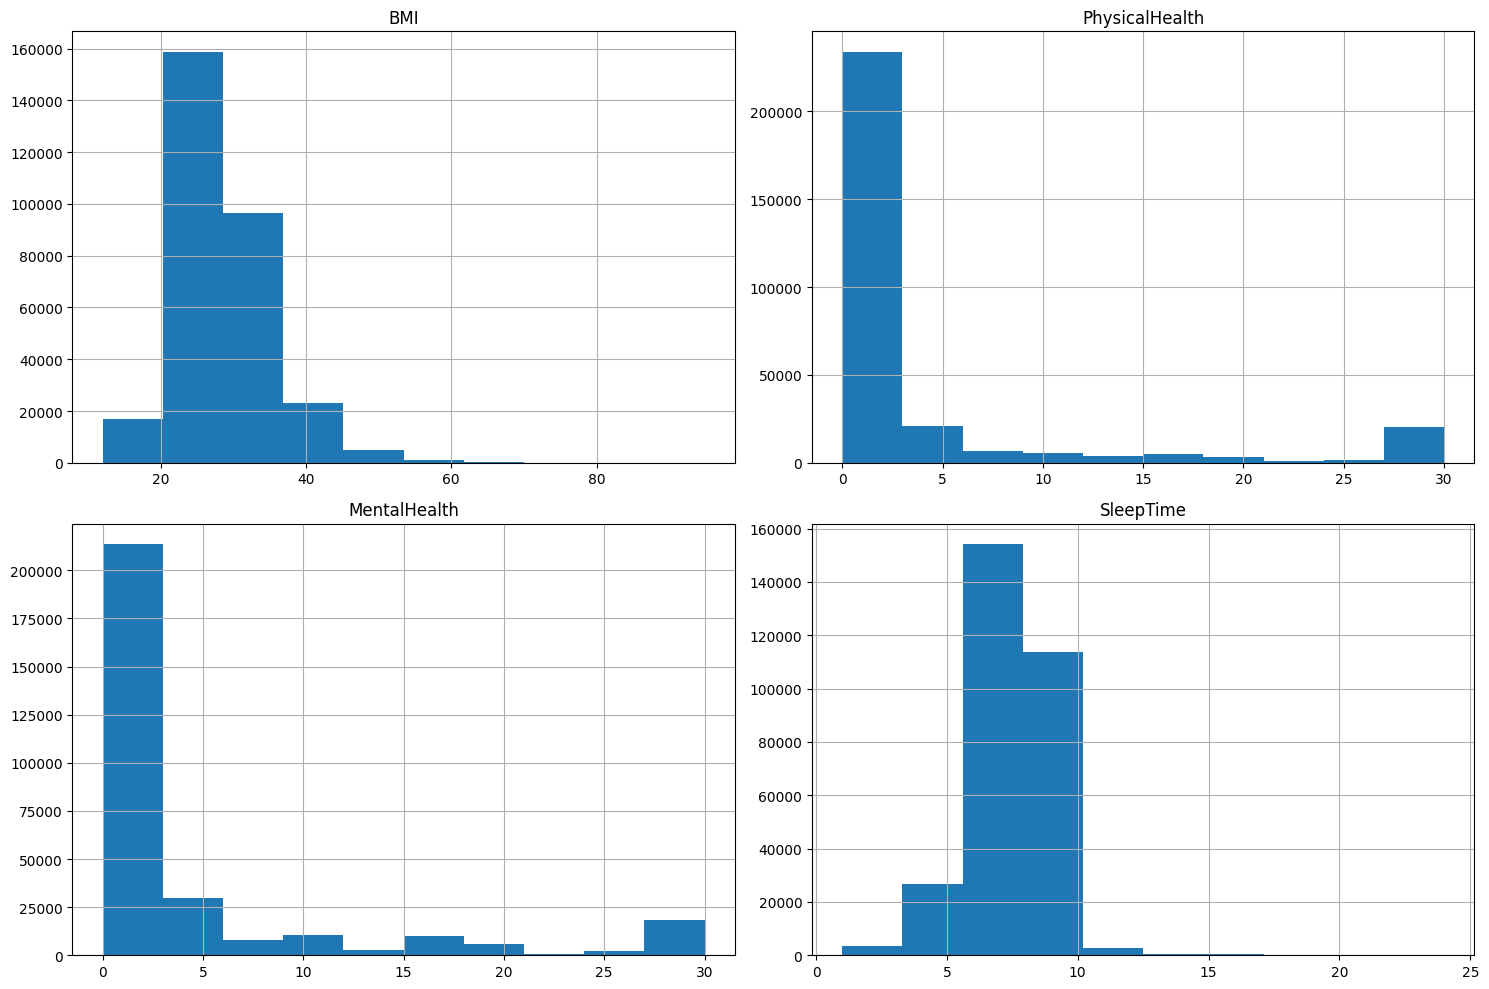

In [7]:
# Visualize the distribution of numeric variables
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

C:\Users\74450\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 301717.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for BMI: ShapiroResult(statistic=0.9305056289383088, pvalue=3.659114736459759e-124)
Shapiro-Wilk test for Sleep Time: ShapiroResult(statistic=0.8938479480016517, pvalue=7.865698286419043e-137)


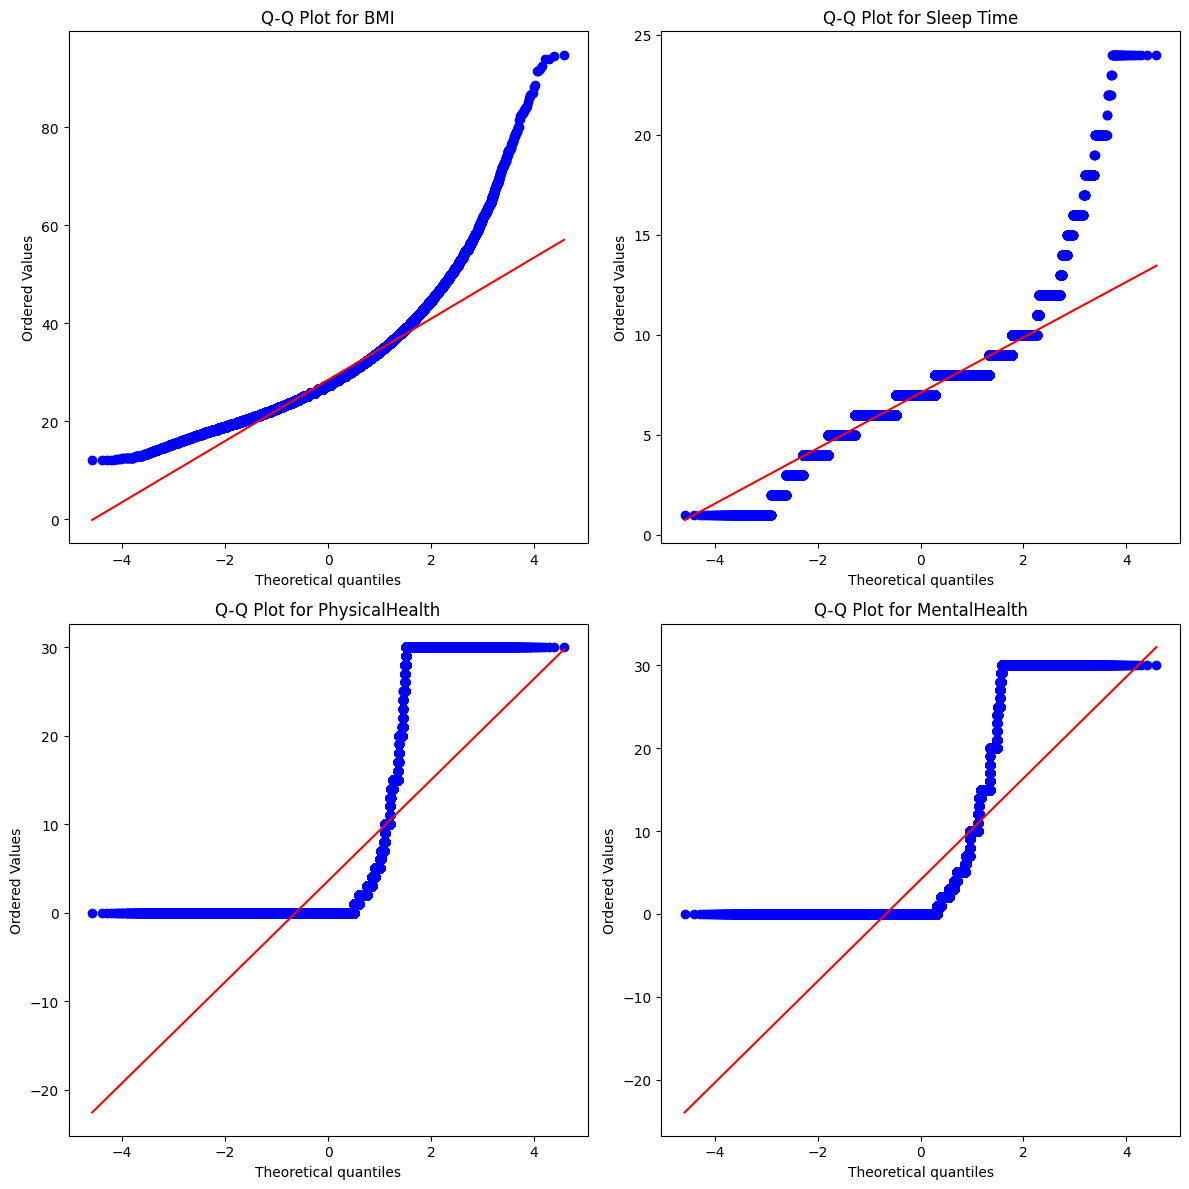

In [8]:
# Shapiro-Wilk test for normality
print("Shapiro-Wilk test for BMI:", stats.shapiro(df['BMI']))
print("Shapiro-Wilk test for Sleep Time:", stats.shapiro(df['SleepTime']))

# Q-Q plots
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
stats.probplot(df['BMI'], dist="norm", plot=plt)
plt.title('Q-Q Plot for BMI')

plt.subplot(2, 2, 2)
stats.probplot(df['SleepTime'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Sleep Time')

plt.subplot(2, 2, 3)
stats.probplot(df['PhysicalHealth'], dist="norm", plot=plt)
plt.title('Q-Q Plot for PhysicalHealth')

plt.subplot(2, 2, 4)
stats.probplot(df['MentalHealth'], dist="norm", plot=plt)
plt.title('Q-Q Plot for MentalHealth')

plt.tight_layout()
plt.show()

In [9]:

# using IQR to detect outliners in BMI
#q1 = df['BMI'].quantile(0.25)
#q3 = df['BMI'].quantile(0.75)
#iqr = q3 - q1

# Define bounds for outliers
#lower_bound = q1 - 1.5 * iqr
#upper_bound = q3 + 1.5 * iqr

# Identify outliers
#outlier_indexes_bmi  = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]

# Plotting a boxplot
#sns.boxplot(x=df['BMI'])
#plt.title('Boxplot of BMI')
#plt.show()

# Print outliers
#print(f"Outliers in 'BMI':")
#print(outlier_indexes_bmi )

In [10]:

# using IQR to detect outliners in SleepTime
#q1 = df['SleepTime'].quantile(0.25)
#q3 = df['SleepTime'].quantile(0.75)
#iqr = q3 - q1

# Define bounds for outliers
#lower_bound = q1 - 1.5 * iqr
#upper_bound = q3 + 1.5 * iqr

# Identify outliers
#outlier_indexes_sleep  = df[(df['SleepTime'] < lower_bound) | (df['SleepTime'] > upper_bound)]

# Plotting a boxplot
#sns.boxplot(x=df['SleepTime'])
#plt.title('Boxplot of SleepTime')
#plt.show()

# Print outliers
#print(f"Outliers in 'SleepTime':")
#print(outlier_indexes_sleep )

In [11]:
# Find common indexes
#common_outliers = list(set(outlier_indexes_bmi) & set(outlier_indexes_sleep))
#common_outliers = [index for index in common_outliers if index in df.index]

# Remove common outliers
#df_cleaned = df.drop(index=common_outliers)

In [12]:
from scipy.stats import boxcox

# Box-Cox requires all data to be positive, hence the offset of 1 if there are zeros
df['BMI_boxcox'], _ = boxcox(df['BMI'] + 1)
df['Sleep_Time_boxcox'], _ = boxcox(df['SleepTime'] + 1)
df['PhysicalHealth_boxcox'], _ = boxcox(df['PhysicalHealth'] + 1)
df['MentalHealth_boxcox'], _ = boxcox(df['MentalHealth'] + 1)


In [13]:
# Check the shape after
#print("Cleaned DataFrame shape:", df_cleaned.shape)

C:\Users\74450\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 301717.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk test for BMI_boxcox: ShapiroResult(statistic=0.999338474235824, pvalue=4.911198405767168e-26)
Shapiro-Wilk test for Sleep_Time_boxcox: ShapiroResult(statistic=0.9013593610218408, pvalue=1.3645133002496408e-134)
Shapiro-Wilk test for PhysicalHealth_boxcox: ShapiroResult(statistic=0.6247965271754085, pvalue=2.74040997714727e-178)
Shapiro-Wilk test for MentalHealth_boxcox: ShapiroResult(statistic=0.6841509331337892, pvalue=2.6231873865402073e-172)


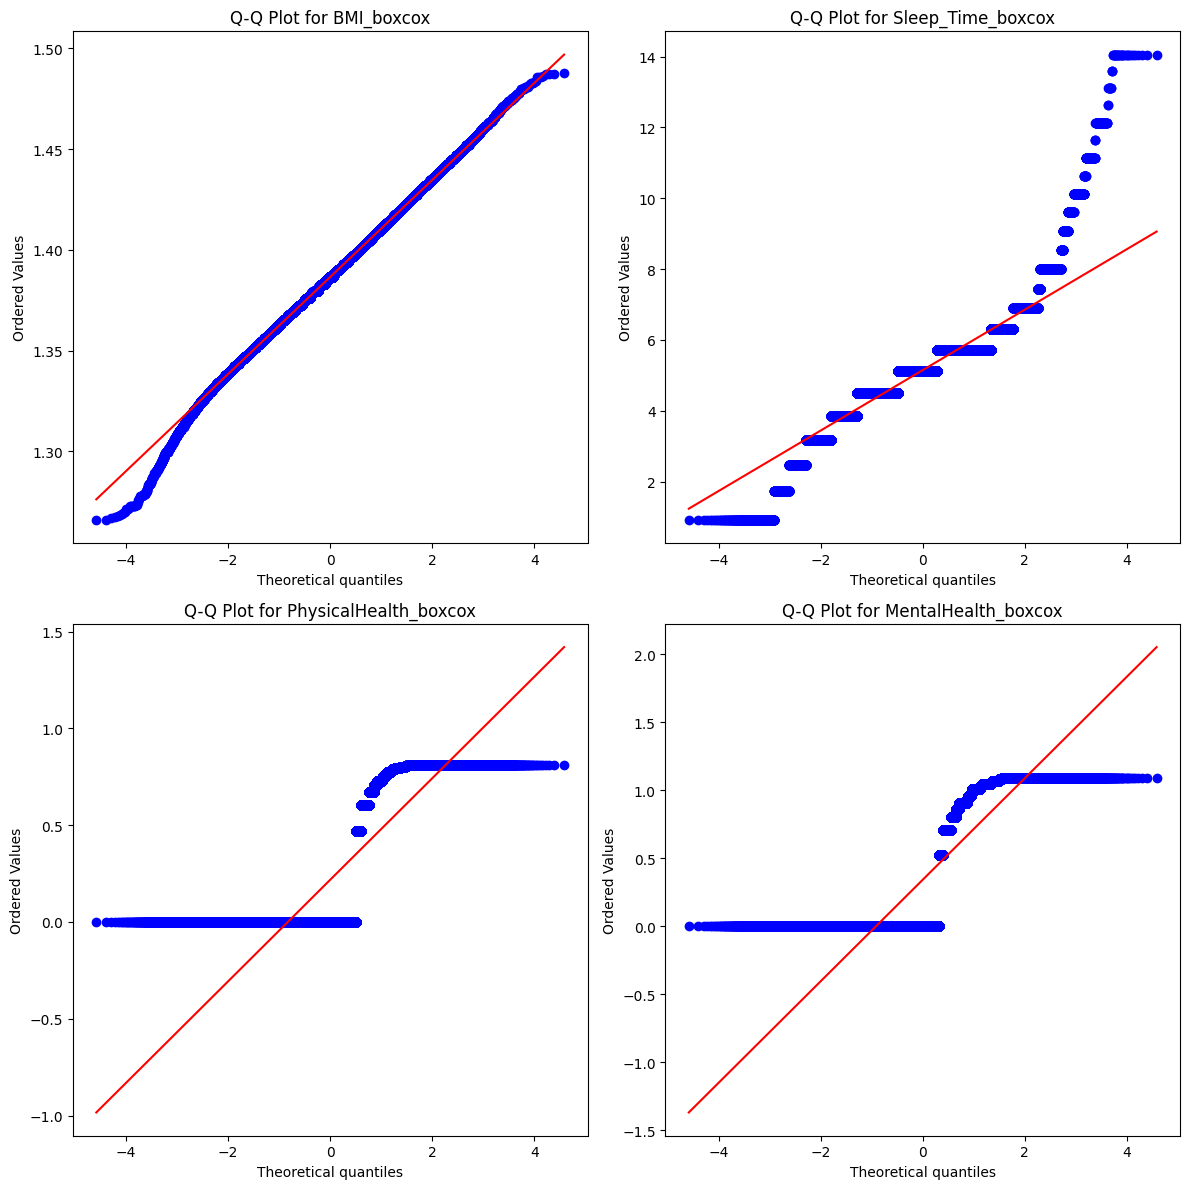

In [14]:
# Shapiro-Wilk test for normality
print("Shapiro-Wilk test for BMI_boxcox:", stats.shapiro(df['BMI_boxcox']))
print("Shapiro-Wilk test for Sleep_Time_boxcox:", stats.shapiro(df['Sleep_Time_boxcox']))
print("Shapiro-Wilk test for PhysicalHealth_boxcox:", stats.shapiro(df['PhysicalHealth_boxcox']))
print("Shapiro-Wilk test for MentalHealth_boxcox:", stats.shapiro(df['MentalHealth_boxcox']))

# Q-Q plots
plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
stats.probplot(df['BMI_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q Plot for BMI_boxcox')

plt.subplot(2, 2, 2)
stats.probplot(df['Sleep_Time_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Sleep_Time_boxcox')

plt.subplot(2, 2, 3)
stats.probplot(df['PhysicalHealth_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q Plot for PhysicalHealth_boxcox')

plt.subplot(2, 2, 4)
stats.probplot(df['MentalHealth_boxcox'], dist="norm", plot=plt)
plt.title('Q-Q Plot for MentalHealth_boxcox')

plt.tight_layout()
plt.show()

In [15]:
# Replace the original 'BMI' and 'Sleep Time' columns with the transformed data
df['BMI'] = df['BMI_boxcox']
df['Sleep Time'] = df['Sleep_Time_boxcox']
df['PhysicalHealth'] = df['PhysicalHealth_boxcox']
df['Sleep MentalHealth'] = df['MentalHealth_boxcox']

# Remove the temporary columns used for the Box-Cox transformation if you no longer need them
df.drop(['BMI_boxcox', 'Sleep_Time_boxcox', 'MentalHealth_boxcox', 'PhysicalHealth_boxcox'], axis=1, inplace=True)

In [16]:
# List of features to check for outliers
features = ['BMI', 'SleepTime']

# Define a cutoff for outliers (e.g., 3 standard deviations from the mean)
cutoff_multiplier = 3

# Apply the outlier detection method to each feature
for feature in features:
    mean = df[feature].mean()
    std_dev = df[feature].std()
    cutoff = std_dev * cutoff_multiplier
    lower, upper = mean - cutoff, mean + cutoff

    # Create a mask for the non-outliers
    mask = (df[feature] >= lower) & (df[feature] <= upper)
    
    # Apply the mask to the dataframe to filter out the outliers
    df_cleaned = df[mask]

print(f"Original dataframe shape: {df.shape}")
print(f"New dataframe shape after outlier removal: {df_cleaned.shape}")

Original dataframe shape: (301717, 20)
New dataframe shape after outlier removal: (297175, 20)


In [17]:
# Store the updated data in df_cleaned
#df_cleaned = df.copy()

In [18]:
# Check categories
unique_AgeCategory_categories = df_cleaned['AgeCategory'].unique()
print(unique_AgeCategory_categories)

unique_Race_categories = df_cleaned['Race'].unique()
print(unique_Race_categories)

unique_Diabetic_categories = df_cleaned['Diabetic'].unique()
print(unique_Diabetic_categories)

unique_GenHealth_categories = df_cleaned['GenHealth'].unique()
print(unique_GenHealth_categories)


['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']


In [19]:
# Create a mapping based on the unique sorted age ranges
age_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80 or older': 12
}

# Apply the mapping to the AgeCategory column
df_cleaned['AgeCategory'] = df_cleaned['AgeCategory'].map(age_mapping)

# Create a mapping based on the Race 
Race_mapping = {
    'White': 0,
    'Black': 1,
    'Asian': 2,
    'American Indian/Alaskan Native': 3,
    'Hispanic': 4,
    'Other': 5,
}


df_cleaned['Race'] = df_cleaned['Race'].map(Race_mapping)

# Create a mapping based on the Diabetic 
Diabetic_mapping = {
    'No': 0,
    'Yes': 1,
    'No, borderline diabetes': 2,
     'Yes (during pregnancy)': 3
}

# Apply the mapping to the Diabetic column
df_cleaned['Diabetic'] = df_cleaned['Diabetic'].map(Diabetic_mapping)


# Create a mapping based on the GenHealth 
GenHealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}

# Apply the mapping to the GenHealth column
df_cleaned['GenHealth'] = df_cleaned['GenHealth'].map(GenHealth_mapping)

# Create a mapping based on the Sex 
Sex_mapping = {
    'Female': 0,
    'Male': 1,
}

# Apply the mapping to the Sex column
df_cleaned['Sex'] = df_cleaned['Sex'].map(Sex_mapping)

#Apply binary mapping on all binary variables
binary_mapping = {'No': 0, 'Yes': 1}
df_cleaned['HeartDisease'] = df_cleaned['HeartDisease'].map(binary_mapping)
df_cleaned['Smoking'] = df_cleaned['Smoking'].map(binary_mapping)
df_cleaned['AlcoholDrinking'] = df_cleaned['AlcoholDrinking'].map(binary_mapping)
df_cleaned['Stroke'] = df_cleaned['Stroke'].map(binary_mapping)
df_cleaned['DiffWalking'] = df_cleaned['DiffWalking'].map(binary_mapping)
df_cleaned['PhysicalActivity'] = df_cleaned['PhysicalActivity'].map(binary_mapping)
df_cleaned['Asthma'] = df_cleaned['Asthma'].map(binary_mapping)
df_cleaned['KidneyDisease'] = df_cleaned['KidneyDisease'].map(binary_mapping)
df_cleaned['SkinCancer'] = df_cleaned['SkinCancer'].map(binary_mapping)



C:\Users\74450\AppData\Local\Temp\ipykernel_7936\2928866201.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['AgeCategory'] = df_cleaned['AgeCategory'].map(age_mapping)
C:\Users\74450\AppData\Local\Temp\ipykernel_7936\2928866201.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Race'] = df_cleaned['Race'].map(Race_mapping)
C:\Users\74450\AppData\Local\Temp\ipykernel_7936\2928866201.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [20]:
df_cleaned.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Sleep Time,Sleep MentalHealth
0,0,1.319723,1,0,0,0.669491,30.0,0,0,7,0,1,1,3,5.0,1,0,1,3.844293,1.089641
1,0,1.349063,0,0,1,0.000000,0.0,0,0,12,0,0,1,3,7.0,0,0,0,5.113684,0.000000
2,0,1.382944,1,0,0,0.801225,30.0,0,1,9,0,1,1,1,8.0,1,0,0,5.719674,1.089641
3,0,1.371699,0,0,0,0.000000,0.0,0,0,11,0,0,0,2,6.0,0,0,1,4.489642,0.000000
4,0,1.369103,0,0,0,0.807782,0.0,1,0,4,0,0,1,3,8.0,0,0,0,5.719674,0.000000


In [21]:
# Save the cleaned DataFrame to a new CSV file
df_cleaned.to_csv('df_cleaned.csv', index=False)
